In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Timbur
[nltk_data]     Dinu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
#Task 1. Reading the .txt file.
text = open(r"\Users\Timbur Dinu\Desktop\bio1\TEST\biology\class_11_biology_chapter_1_0.txt").read().lower().replace('\n', ' ')

In [13]:
#Task 2.1 Get the number of sentences extracted by sent_tokenize
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(text)
nr_sentences = len(sentences)
print('There are', nr_sentences,'sentences extracted by sent_tokenize.')

#Task 2.2 Get the number of tokens extracted by word_tokenize
from nltk.tokenize import word_tokenize

word = word_tokenize(text)
nr_word = len(word)
print('There are', nr_word,'tokens extracted by word_tokenize.')

#Task 2.3 Get the number of tokens extracted by casual_tokenize
from nltk.tokenize import casual_tokenize

casual = casual_tokenize(text)
nr_casual = len(casual)
print('There are', nr_casual,'tokens extracted by casual_tokenize.')

#Task 2.4 Get the number of tokens extracted by casual_tokenize
from nltk.tokenize import MWETokenizer

mwe = MWETokenizer([('some', 'of'), ('led','to'), ('spin', 'off')])
mwe = mwe.tokenize(casual_tokenize(text))
nr_mwe = len(mwe)
print('There are', nr_mwe,'tokens extracted by MWETokenizer.')

There are 13 sentences extracted by sent_tokenize.
There are 251 tokens extracted by word_tokenize.
There are 253 tokens extracted by casual_tokenize.
There are 250 tokens extracted by MWETokenizer.


In [14]:
#Task 2.5 Words per sentence -> sent_tokenize
import math

total_words = len(casual_tokenize(text))
total_words
words_per_sentence = math.trunc(total_words / nr_sentences)
print(words_per_sentence,'words per sentence - sent_tokenize')

#Words per sentence -> word_tokenize
words_per_sentence = math.trunc(nr_word / nr_sentences)
print(words_per_sentence,'words per sentence - word_tokenize')

#Words per sentence -> casual_tokenize
words_per_sentence = math.trunc(nr_casual / nr_sentences)
print(words_per_sentence,'words per sentence - casual_tokenize')

#Words per sentence -> MWETokenizer
words_per_sentence = math.trunc(nr_mwe / nr_sentences)
print(words_per_sentence,'words per sentence - MWETokenizer')

19 words per sentence - sent_tokenize
19 words per sentence - word_tokenize
19 words per sentence - casual_tokenize
19 words per sentence - MWETokenizer


In [15]:
#Task 3. Comparing the Stemmers.
import pandas
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer

l_porter = []
l_lancaster = []
l_snowball = []
lists = word.copy()
lists.extend(casual)
lists.extend(mwe)
for w in lists:
    p = PorterStemmer().stem(w)
    l_porter.append(p)
    p = LancasterStemmer().stem(w)
    l_lancaster.append(p)
    p = SnowballStemmer(language='english').stem(w)
    l_snowball.append(p)
d = {'Original_token': lists, 
      'Porter':l_porter, 
      'Lancaster':l_lancaster, 
      'Snowball':l_snowball}
dataframe = pandas.DataFrame(data = d, index = None)
dataframe

#This dataframe points out that these 3 stemmers extract the root of the token differently. 
#For instance, the root of 'chapter' extracted with LancasterStemmer is 'chapt', but when extracted 
#with PorterStemmer or Snowball - it is 'chapter'. Hence, the accuracy of all stemmers isn't very big.

,Original_token,Porter,Lancaster,Snowball
0,chapter,chapter,chapt,chapter
1,1,1,1,1
2,the,the,the,the
3,living,live,liv,live
4,world,world,world,world
...,...,...,...,...
749,™,™,™,™
750,s,s,s,s
751,perspective,perspect,perspect,perspect
752,.,.,.,.


In [16]:
#Task 4.1 Frequencies of words.
from nltk.probability import FreqDist

freq = FreqDist(casual_tokenize(text))
freq_w = []
for i in freq.most_common(10):
        freq_w.append(i[0])
print('10 most frequent tokens are', freq_w)
print('\nHapaxes:\n', freq.hapaxes())

10 most frequent tokens are ['of', 'the', '.', 'and', 'living', ',', 'in', 'organisms', 'chapter', 'a']

Hapaxes:
 ['1', '2', '3', 'plant', '4', 'animal', 'i', 'is', 'science', 'processes', 'comprises', 'an', 'amazing', 'easily', 'perceive', 'difference', 'between', 'deified', '(', 'wind', 'sea', 'fire', 'etc', ')', 'common', 'feature', 'animate', 'objects', 'sense', 'awe', 'or', 'fear', 'they', 'evoked', 'beings', 'began', 'much', 'later', 'history', 'societies', 'indulged', 'anthropocentric', 'view', 'register', 'limited', 'progress', 'knowledge', 'systematic', 'monumental', 'brought', 'out', 'necessity', 'detailed', 'systems', 'identification', 'nomenclature', 'biggest', 'spin', 'off', 'studies', 'recognition', 'sharing', 'similarities', 'both', 'horizontally', 'vertically', 'present', 'day', 'are', 'related', 'each', 'other', 'also', 'ever', 'lived', 'on', 'earth', 'revelation', 'humbled', 'led', 'cultural', 'movements', 'for', 'conservation', 'biodiversity', 'following', 'chapters

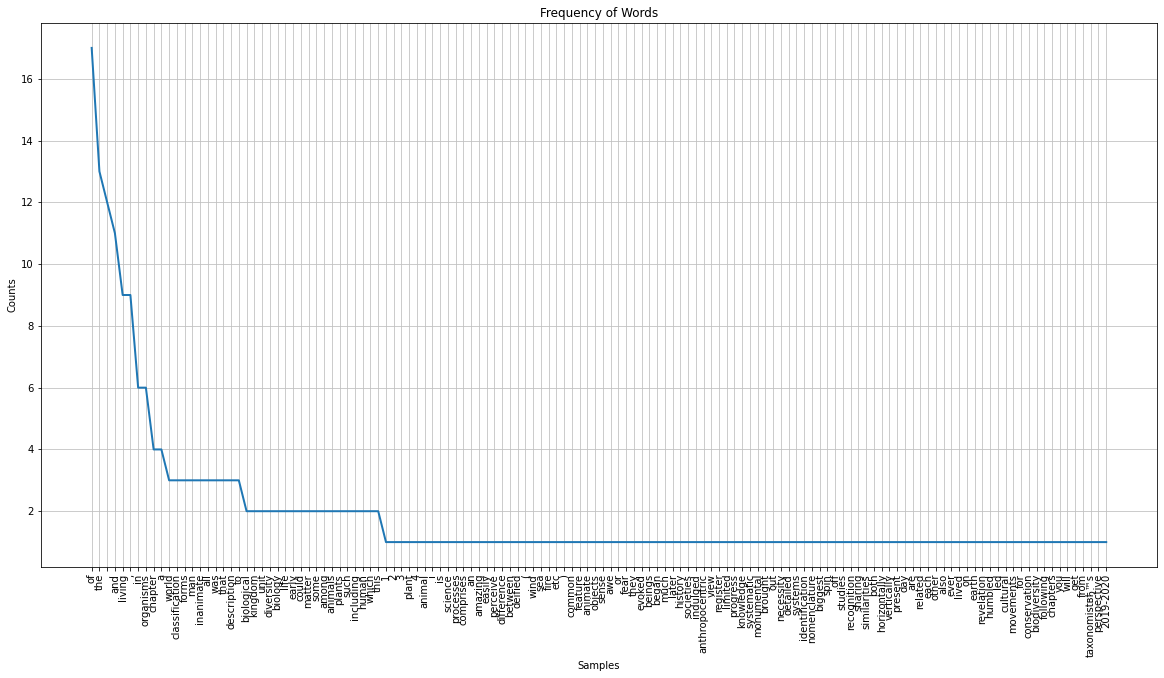



This graphic is similar to the zipf law, since it emphasizes that most words have a small frequency, while a very few amount of them have high frequency. Therefore, as zipf law says, the rank-frequency distribution is an inverse relation.


In [17]:
#Task 4.2 Frequencies of words.
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 10))
plt.title('Frequency of Words')
tokens = word_tokenize(text)
fd = nltk.FreqDist(tokens)
fd.plot(nr_word, cumulative = False)
print('\n\nThis graphic is similar to the zipf law, since it emphasizes that most words have a small frequency, while a very few amount of them have high frequency. Therefore, as zipf law says, the rank-frequency distribution is an inverse relation.')

In [18]:
#Task 5. Part of speech tagging.
from nltk import pos_tag
import collections
from colorama import Fore
nltk.download('universal_tagset')

nr_pos = -1
dictz = {}
pos_list = pos_tag(casual_tokenize(text), tagset = 'universal')
for i in pos_list:
    key = i[1]
    word = i[0]
    if key in dictz: 
        dictz[key].append(word)
    else:
        dictz[key] = []
        nr_pos += 1
        dictz[key].append(word)

i = -1
for key, value in dictz.items():
    i += 1
    if i == 0:
        print('{', key, ' : ', value)
    elif i == nr_pos:
        print(key, ' : ', value, '}\n')
    else:
        print(key, ' : ', value)

pos_counts = collections.Counter((i[1] for i in pos_list))
pos = pos_counts.most_common(11)
print(Fore.BLUE + 'The most frequent part of speech is', pos[0][0])
print('The least frequent part of speech is', pos[nr_pos][0])


#The most common part of speech is the noun, inasmuch as a coherent sentence can not be formed without the use of nouns. 
#Moreover, nouns are the foremost elements of a sentence, such as subjects and objects.
#The part of speech that has the smallest frequency is the pronoun.

{ NOUN  :  ['chapter', 'living', 'world', 'chapter', 'classification', 'chapter', 'plant', 'kingdom', 'chapter', 'kingdom', 'unit', 'diversity', 'living', 'world', 'biology', 'science', 'life', 'forms', 'living', 'processes', 'living', 'world', 'diversity', 'living', 'organisms', 'man', 'difference', 'matter', 'organisms', 'man', 'matter', 'wind', 'sea', 'fire', 'etc', 'animals', 'plants', 'feature', 'forms', 'inanimate', 'objects', 'sense', 'awe', 'fear', 'description', 'living', 'organisms', 'beings', 'history', 'societies', 'view', 'biology', 'progress', 'knowledge', 'description', 'life', 'forms', 'necessity', 'systems', 'identification', 'nomenclature', 'classification', 'spin', 'studies', 'recognition', 'sharing', 'similarities', 'living', 'organisms', 'day', 'living', 'organisms', 'organisms', 'earth', 'revelation', 'man', 'movements', 'conservation', 'biodiversity', 'chapters', 'unit', 'description', 'classification', 'animals', 'plants', 'taxonomistвђ', '™', 's', 'perspective'

[nltk_data] Downloading package universal_tagset to C:\Users\Timbur
[nltk_data]     Dinu\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
